In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os

import sys
sys.path.append('/reg/neh/home/qiaoshen/GitHub/loki/src/RingData/')
from DiffCorr import DiffCorr

In [2]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/gai/run102.tbl','r')
mask = np.array(f['polar_mask_binned'].value==f['polar_mask_binned'].value.max(), dtype = int)

dc = DiffCorr(mask[None,:],np.array(range(mask.shape[0])),0,pre_dif=True)
mask_cor  =  dc.autocorr()

In [8]:
def gather_pca0(qmin,qmax,filename):
    cors = []
    f = h5py.File(filename, 'r')
#     print f['q10'].keys()
    for qq in range(qmin,qmax+1):
#         print qq
        cors.append(f['q%d'%qq]['pca0']['train_difcor'][0])
    
    return np.array(cors)

def normalize_shots(shots):
    x = shots.copy()
    x-=x.min(-1)[:,None]
    x/=x.max(-1)[:,None]
    
    return x

[u'q10', u'q11', u'q12', u'q13', u'q14', u'q15', u'q16', u'q17', u'q18', u'q19', u'q20', u'q21', u'q22', u'q23', u'q24', u'q25', u'q26', u'q27', u'q28', u'q29', u'q30', u'q31', u'q32']


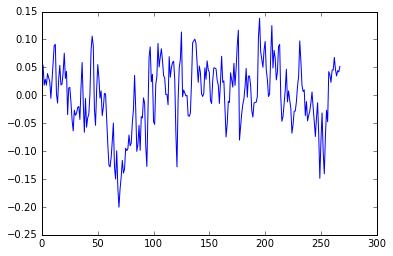

In [4]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/gai_filtered/GDP_pro/run102_PCA-denoise2.h5','r')
print f.keys()

plt.plot(f['q10']['pca_components'][1])

In [9]:

pca_dir ="/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/gai_filtered/"
pro =gather_pca0(10,32,os.path.join(pca_dir,'GDP_pro/run102_PCA-denoise2.h5') )
pro/=mask_cor[0,10:33]
buf =gather_pca0(10,32,os.path.join(pca_dir,'GDP_buf/run106_PCA-denoise2.h5') )
buf/=mask_cor[0,10:33]

cali_pca_dir ="/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/cali_gai_filtered/"
cali_pro =gather_pca0(10,32,os.path.join(cali_pca_dir,'GDP_pro/run102_PCA-denoise2.h5') )
cali_pro /=mask_cor[0,10:33]
norm_cali_pro = normalize_shots(cali_pro[:,10:326/2-10])
cali_buf =gather_pca0(10,32,os.path.join(cali_pca_dir,'GDP_buf/run106_PCA-denoise2.h5') )
cali_buf/=mask_cor[0,10:33]
norm_cali_buf = normalize_shots(cali_buf[:,10:326/2-10])
# cali_pca_dir2 ="/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/cali_gai_filtered/"
# cali_pro2 =gather_pca0(14,20,os.path.join(cali_pca_dir2,'GDP_pro/run111_PCA-denoise.h5') )

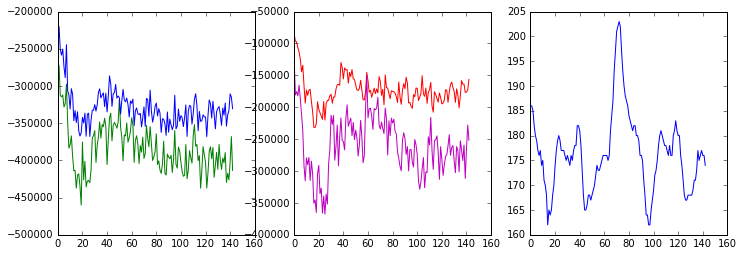

In [24]:
qidx = 14
plt.figure(figsize=[12,4])
plt.subplot(131)
plt.plot(cali_pro[qidx, 10:326/2-10], 'g')
plt.plot(pro[qidx, 10:326/2-10],'b')
# plt.plot(cali_buf[qidx, 10:326/2-10], 'm')
# plt.plot(norm_cali_pro[qidx])

plt.subplot(132)
# plt.plot(norm_cali_buf[qidx])
# plt.plot(pro[qidx, 10:326/2-10],'b')
plt.plot(buf[qidx, 10:326/2-10],'r')
plt.plot(cali_buf[qidx, 10:326/2-10], 'm')
plt.subplot(133)
plt.plot(mask_cor[0,qidx+10,10:326/2-10])

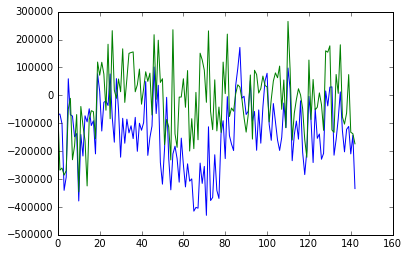

In [271]:
qidx =22
plt.figure(figsize=[6,4])
# plt.subplot(121)
plt.plot(pro[qidx, 10:326/2-10]-buf[qidx, 10:326/2-10])
# plt.subplot(122)
plt.plot(cali_pro[qidx, 10:326/2-10]-cali_buf[5, 10:326/2-10],'g')

# plt.plot(buf[qidx, 10:326/2-10])
# plt.plot(cali_buf[qidx, 10:326/2-10])
# plt.ylim(-1e9,1e9)